In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

path = r'C:\Users\howel\OneDrive\Instacart Basket Analysis'

# Import the fully merged data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_cust_merged.pkl'))

Text(0, 0.5, 'Frequency')

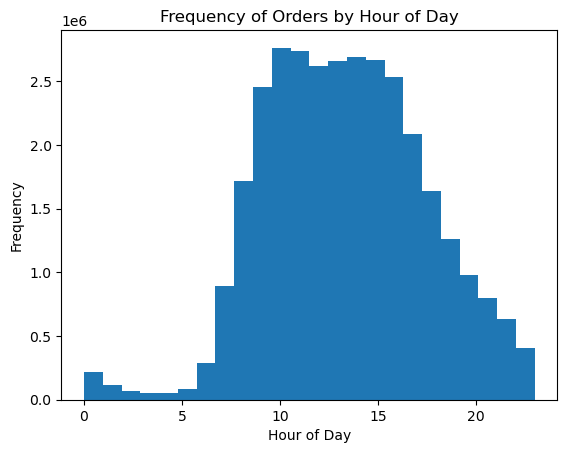

In [2]:
# Create histogram
hist_order_hour = df['order_hour_of_day'].plot.hist(bins = 24)

# Set title and labels (optional but good practice)
plt.title('Frequency of Orders by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')

The histogram displays the frequency of orders for every hour of the day. It shows that the peak business hours are from 10:00 AM to 3:00 PM. During this window, the number of orders is at its highest. Conversely, the fewest orders are placed between midnight and 6:00 AM. This suggests that scheduling ads during the early morning hours (0–6) would reach fewer customers, while ads during the mid-day peak would reach the maximum audience.

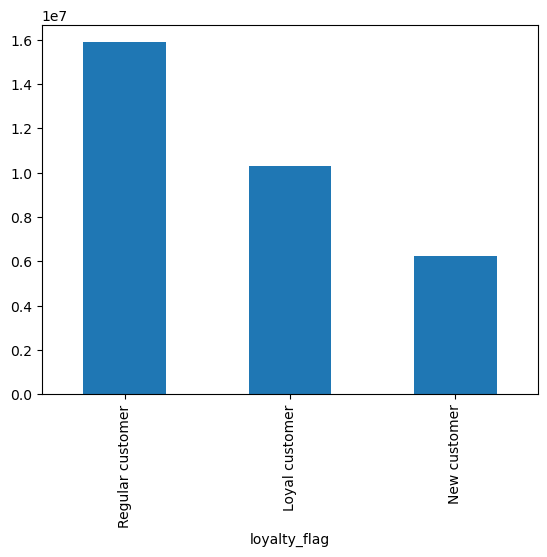

In [3]:
# Create bar chart
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar()

This bar chart illustrates the distribution of orders among three customer loyalty categories: 'Loyal customers,' 'Regular customers,' and 'New customers.' The chart shows that Regular customers make up the largest portion of orders, followed by Loyal customers. This indicates that while the base of loyal, returning customers is strong, the majority of the business comes from customers who fall into the 'Regular' frequency category.

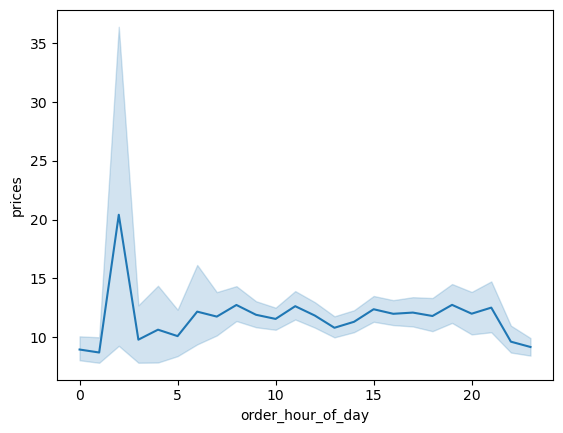

In [4]:
# 1. Create a random sample (70/30 split)
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7
big = df[dev]
small = df[~dev]

# 2. Reduce the sample to only needed columns for speed
df_2 = small[['order_hour_of_day', 'prices']]

# 3. Create the line chart
line_hour_prices = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

The line chart plots the average price of products ordered against the hour of the day. [Option A - if flat]: The line is relatively flat, indicating that the average expenditure per item does not vary significantly depending on the time of day. [Option B - if erratic]: We see some variability in the early morning hours, which might be driven by a smaller sample size of orders or specific high-value purchases made at those times. However, during peak hours (10 AM - 3 PM), the average price remains stable.

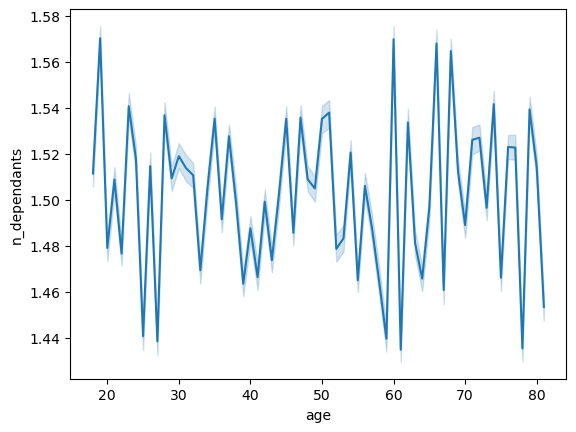

In [5]:
# Use the same 'small' sample from the previous step to save memory
df_3 = small[['age', 'n_dependants']]

# Create line chart
line_age_dependants = sns.lineplot(data = df_3, x = 'age', y = 'n_dependants')

This line chart explores the relationship between a customer's age and their number of dependents. The line shows no clear trend or correlation between age and the number of dependents. Different age groups (from 20s to 80s) show high variability, suggesting that family size is not determined by age in this customer base. This information suggests that we cannot assume family status based solely on a customer's age for marketing segmentation.

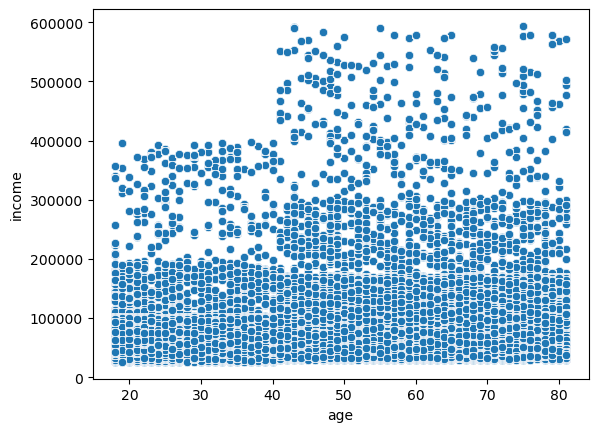

In [6]:
# Create scatterplot
scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = df)

The scatterplot maps customer age against their income. We observe a clear positive correlation:

1) Lower Income Ceiling for Younger Ages: Customers aged 20–40 generally have an income capped around $200,000 to $400,000.

2) Higher Income Potential for Older Ages: Beyond age 40, we see a significant segment of customers with much higher incomes (up to $600,000).

This suggests that spending power increases with age, particularly for the 40+ demographic. Marketing campaigns for premium or high-cost products might be better targeted at this older age group.

In [8]:
# Export Histogram
hist_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour.png'))

# Export Bar Chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'))

# Export Line Charts (Note: access the figure object first if using sns)
line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

# Export Scatterplot
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))